LR accuracy: mean: 0.941667, std: 0.065085 
LDA accuracy: mean: 0.975000, std: 0.038188 


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packag

KNN accuracy: mean: 0.958333, std: 0.041667 
CART accuracy: mean: 0.941667, std: 0.038188 
NB accuracy: mean: 0.950000, std: 0.055277 
SVM accuracy: mean: 0.983333, std: 0.033333 


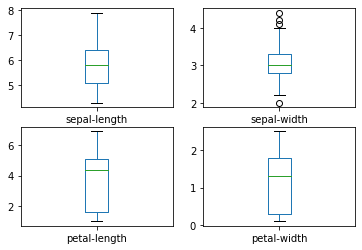

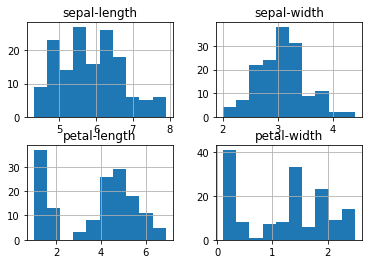

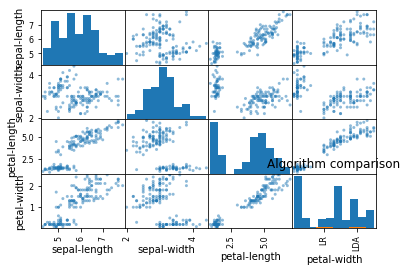

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
url = "https://raw.githubusercontent.com/justkacz/csvfiles/main/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset.shape
dataset.describe()
dataset.groupby("class").agg(['max', 'min'])
dataset.groupby("class").size()

# UNIVARIATE PLOTS - plots of each individual variable
dataset.plot(kind='box', subplots=True, layout=(2,2))
dataset.hist()

# MULTIVARIATE PLOTS - interactions between the variables
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)

# features:
X=dataset.iloc[:,0:4]
# labesl:
y=dataset.iloc[:,4]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

# k-fold cross validation - split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations 
# of train-test splits, used to estimate the skill of a machine learning model on unseen data

# MODELS:
# LINEAR - Logistic Regression (LR), Linear Discriminant Analysis (LDA)
# NON-LINEAR: K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Gaussian Naive Bayes (NB), Support Vector Machines (SVM)

models= []
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results=[]
names=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv)
    names.append(name)
    print('%s accuracy: mean: %f, std: %f '%(name, cv.mean(), cv.std()))
    
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm comparison')
pyplot.show()

#  NAJLEPSZY MODEL SVC
model=SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# EVALUATE PREDICTIONS:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [32]:
train_test_split?